In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Challenge 1**

In [28]:
dfs = []
filename_extensions = ["29", "22", "15", "08"]
for extension in filename_extensions:
    dfs.append(pd.read_csv("http://web.mta.info/developers/data/nyct/turnstile/turnstile_1906"+ extension + ".txt"))

# Concatenate all data into one DataFrame
df = pd.concat(dfs, ignore_index=True)

In [29]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581


In [30]:
df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
823380,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/05/2019,17:00:00,RECOVR AUD,5554,379
823381,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/05/2019,21:00:00,REGULAR,5554,379
823382,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/06/2019,01:00:00,REGULAR,5554,379
823383,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/06/2019,05:00:00,REGULAR,5554,379
823384,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,06/06/2019,09:00:00,REGULAR,5554,379


**Challenge 2**

In [31]:
type(df.DATE), type(df.TIME)

(pandas.core.series.Series, pandas.core.series.Series)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823385 entries, 0 to 823384
Data columns (total 11 columns):
 #   Column                                                                Non-Null Count   Dtype 
---  ------                                                                --------------   ----- 
 0   C/A                                                                   823385 non-null  object
 1   UNIT                                                                  823385 non-null  object
 2   SCP                                                                   823385 non-null  object
 3   STATION                                                               823385 non-null  object
 4   LINENAME                                                              823385 non-null  object
 5   DIVISION                                                              823385 non-null  object
 6   DATE                                                                  823385 non-null  objec

In [33]:
"""
It's worth mentioning that you may have been able to read this in directly
e.g. if you were using read_csv using parse_dates=[['Date', 'Time']].
"""

df['TIMESTAMP'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

In [55]:
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIMESTAMP
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,20:00:00,REGULAR,7108333,2407608,2019-06-22 20:00:00
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,00:00:00,REGULAR,7108482,2407628,2019-06-23 00:00:00
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,04:00:00,REGULAR,7108500,2407639,2019-06-23 04:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,08:00:00,REGULAR,7108512,2407655,2019-06-23 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/23/2019,12:00:00,REGULAR,7108584,2407707,2019-06-23 12:00:00


**Challenge 3**

In [59]:
# Most turnstiles have 6 daily entires, with turnstile defined as combination of "C/A", "UNIT", "SCP", "STATION". Do we drop the ones without 6???

df.groupby(["DATE", "C/A", "UNIT", "SCP", "STATION"])["ENTRIES"].count()

DATE        C/A    UNIT  SCP       STATION      
06/01/2019  A002   R051  02-00-00  59 ST            6
                         02-00-01  59 ST            6
                         02-03-00  59 ST            6
                         02-03-01  59 ST            6
                         02-03-02  59 ST            6
                                                   ..
06/28/2019  TRAM2  R469  00-00-01  RIT-ROOSEVELT    6
                         00-03-00  RIT-ROOSEVELT    6
                         00-03-01  RIT-ROOSEVELT    6
                         00-05-00  RIT-ROOSEVELT    6
                         00-05-01  RIT-ROOSEVELT    6
Name: ENTRIES, Length: 136151, dtype: int64

In [ ]:
df.groupby(["DATE", "C/A", "UNIT", "SCP", "STATION"])["ENTRIES"].count().value_counts()

In [57]:
# how to filter using a groupby? I want to identify those turnstyles with more than 6 daily counts

df[df.groupby(["DATE", "C/A", "UNIT", "SCP", "STATION"])["ENTRIES"].count() > 6]

<ipython-input-57-19964ce2b0f4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df.groupby(["DATE", "C/A", "UNIT", "SCP", "STATION"])["ENTRIES"].count() > 6]


ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long'

**Challenge 4**

In [75]:
# filter df to represent a single turnstile

single_turnstile = df.loc[(df["C/A"] == "A002") & (df["UNIT"] == "R051") & (df["SCP"] == "02-00-00") & (df["STATION"] == "59 ST")]

In [76]:
single_turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIMESTAMP
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00


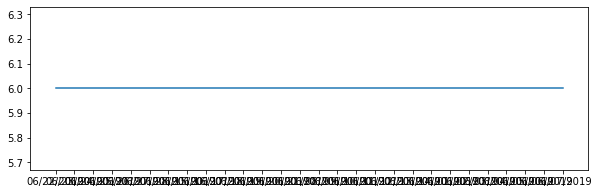

In [83]:
#...this can't be right

plt.figure(figsize=(10,3))
plt.plot(single_turnstile["DATE"].unique(), single_turnstile.groupby("DATE")["ENTRIES"].count())

In [78]:
df.head(100)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TIMESTAMP
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,04:00:00,REGULAR,7107738,2407465,2019-06-22 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,08:00:00,REGULAR,7107761,2407491,2019-06-22 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,12:00:00,REGULAR,7107858,2407541,2019-06-22 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,16:00:00,REGULAR,7108075,2407581,2019-06-22 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
95,A002,R051,02-03-00,59 ST,NQR456W,BMT,06/23/2019,20:00:00,REGULAR,1249442,4700324,2019-06-23 20:00:00
96,A002,R051,02-03-00,59 ST,NQR456W,BMT,06/24/2019,00:00:00,REGULAR,1249489,4700436,2019-06-24 00:00:00
97,A002,R051,02-03-00,59 ST,NQR456W,BMT,06/24/2019,04:00:00,REGULAR,1249492,4700448,2019-06-24 04:00:00
98,A002,R051,02-03-00,59 ST,NQR456W,BMT,06/24/2019,08:00:00,REGULAR,1249506,4700680,2019-06-24 08:00:00


In [ ]:
"""identify locations of below offices in NYC
Accenture 
Thoughtworks 
Amazon 
Bank of America 
Facebook 
HP 
Microsoft 
Two Sigma 
Workday 
Capital One 
Ebay 
Google 
PWC
"""